In [3]:
pip install pandas numpy matplotlib seaborn prophet plotly statsmodels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# Import danych
sales = pd.read_csv('sales data-set.csv')
features = pd.read_csv('Features data set.csv')
stores = pd.read_csv('stores data-set.csv')

In [8]:
# Łączenie danych
df = sales.merge(features, on=['Store','Date','IsHoliday'], how='left')
df = df.merge(stores, on='Store',how='left')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) # Konwersja dat
df.sort_values('Date', inplace=True) # Sortowanie po dacie

In [11]:
# Czyszczenie danych
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)

In [12]:
# KPI
total_sales = df['Weekly_Sales'].sum()
avg_sales = df['Weekly_Sales'].mean()

In [32]:
# Grupowanie po dacie
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Weekly_Sales'].sum()
monthly_sales_reset = monthly_sales.reset_index().rename(columns={'Month': 'Date'})
monthly_sales_reset['Date'] = monthly_sales_reset['Date'].dt.to_timestamp() if isinstance(monthly_sales_reset['Date']
.dtype, pd.PeriodDtype) else pd.to_datetime(monthly_sales_reset['Date'])

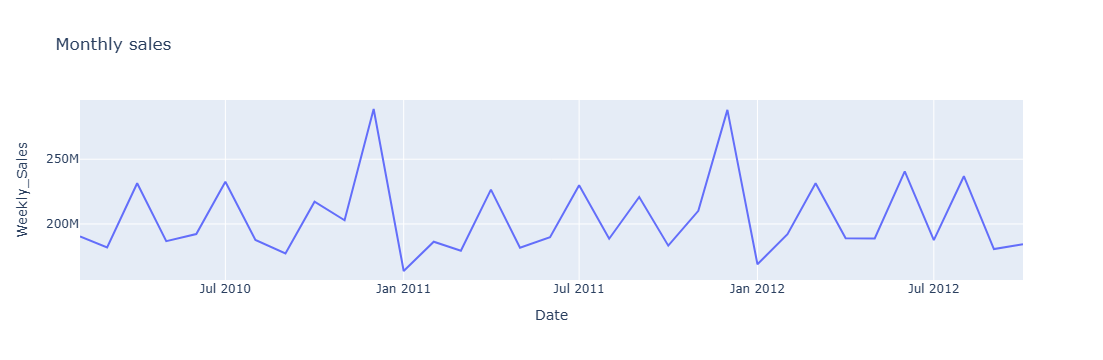

In [36]:
# Wizualizacja trendu
fig = px.line(monthly_sales_reset, x='Date', y='Weekly_Sales', title='Monthly sales')
fig.show()

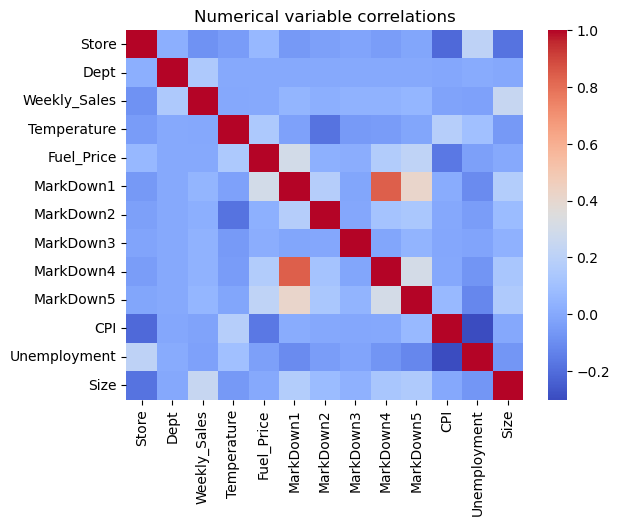

In [21]:
# Wizualizacja korelacji
numeric_df = df.select_dtypes(include=['float64','int64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Numerical variable correlations')
plt.show()

In [37]:
# Przygotowanie danych do Prophet
prophet_df = monthly_sales_reset.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

In [40]:
# Model
model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)
future = model.make_future_dataframe(periods=12,freq='ME')
forecast = model.predict(future)

22:01:30 - cmdstanpy - INFO - Chain [1] start processing
22:01:30 - cmdstanpy - INFO - Chain [1] done processing


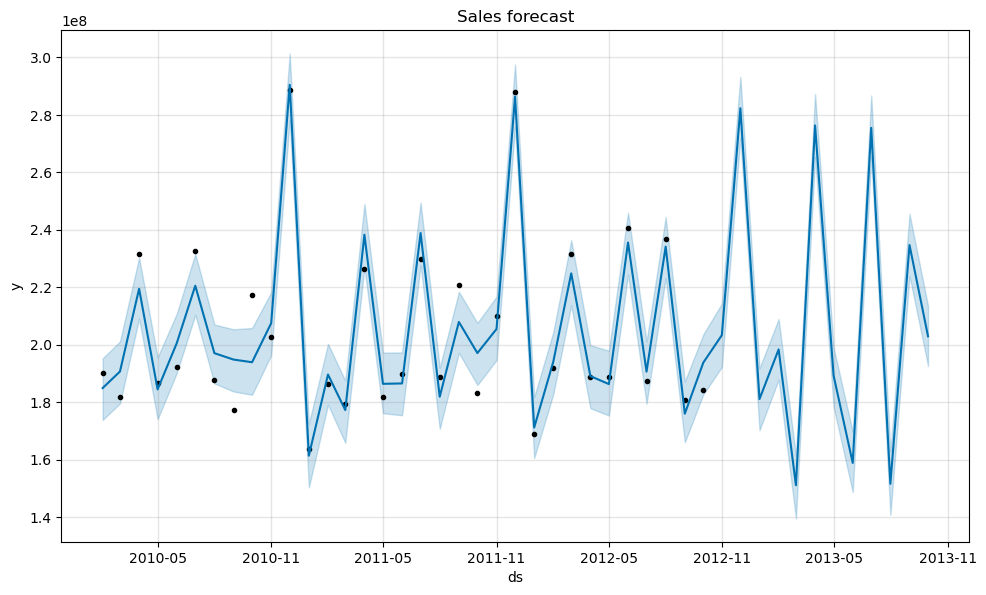

In [42]:
# Wizualizacja prognozy
fig_prophet = model.plot(forecast)
plt.title('Sales forecast')
plt.show()

In [ ]:
# Prognoza: Wzrost o 15% w 2013
# Rekomendacja: Zwiększ zapasy w Q4